# Importação das bibliotecas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Carregamento da base de dados

In [ ]:
data = pd.read_csv("./datatran2021.csv", sep = ';', encoding="ISO-8859-1")
# data.head()

In [ ]:
data.shape

(64539, 30)

# Seleção do estado
Seção utilizada para filtrar os dados do estado de São Paulo - SP.

In [ ]:
data = data.drop (data[data['uf'] != 'SP'].index)

In [ ]:
data.shape

(4300, 30)

## Identificação de dados nulos
Está seção é responsável listar e remover a linha que contém alguma informação nula.

In [ ]:
data[data.isnull().any(axis=1)]
data.isnull().sum()

id                        0
data_inversa              0
dia_semana                0
horario                   0
uf                        0
br                        8
km                        8
municipio                 0
causa_acidente            0
tipo_acidente             0
classificacao_acidente    0
fase_dia                  0
sentido_via               0
condicao_metereologica    0
tipo_pista                0
tracado_via               0
uso_solo                  0
pessoas                   0
mortos                    0
feridos_leves             0
feridos_graves            0
ilesos                    0
ignorados                 0
feridos                   0
veiculos                  0
latitude                  0
longitude                 0
regional                  0
delegacia                 0
uop                       1
dtype: int64

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.shape

(4292, 30)

In [ ]:
data.columns

Index(['id', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km',
       'municipio', 'causa_acidente', 'tipo_acidente',
       'classificacao_acidente', 'fase_dia', 'sentido_via',
       'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
       'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos',
       'ignorados', 'feridos', 'veiculos', 'latitude', 'longitude', 'regional',
       'delegacia', 'uop'],
      dtype='object')

In [ ]:
# data.dtypes

## Salvando o resultado do filtro
Salva o resultado do filtro em um novo arquivo.

In [ ]:
data.to_csv('dataset_SP_2021.csv',  sep = ';', index=False, encoding="ISO-8859-1")

# Tipos de acidentes de trânsito
Tipos de acidentes de trânsito registrados na base de dados.

In [ ]:
data['tipo_acidente'].value_counts()

Colisão traseira                  1092
Colisão com objeto                 575
Colisão lateral mesmo sentido      518
Tombamento                         485
Saída de leito carroçável          393
Atropelamento de Pedestre          246
Queda de ocupante de veículo       237
Colisão transversal                185
Capotamento                        137
Engavetamento                      115
Incêndio                           109
Colisão frontal                     70
Atropelamento de Animal             38
Colisão lateral                     34
Colisão lateral sentido oposto      25
Eventos atípicos                    19
Derramamento de carga               14
Name: tipo_acidente, dtype: int64

In [ ]:
dict_tipo_acidente = dict(data['tipo_acidente'].value_counts())

In [ ]:
dict_tipo_acidente.keys()

dict_keys(['Colisão traseira', 'Colisão com objeto', 'Colisão lateral mesmo sentido', 'Tombamento', 'Saída de leito carroçável', 'Atropelamento de Pedestre', 'Queda de ocupante de veículo', 'Colisão transversal', 'Capotamento', 'Engavetamento', 'Incêndio', 'Colisão frontal', 'Atropelamento de Animal', 'Colisão lateral', 'Colisão lateral sentido oposto', 'Eventos atípicos', 'Derramamento de carga'])

In [ ]:
dict_tipo_acidente.values()

dict_values([1092, 575, 518, 485, 393, 246, 237, 185, 137, 115, 109, 70, 38, 34, 25, 19, 14])

## Gráfico de barra - Horizontal

In [ ]:
list_tipos_acidentes_keys = list(dict_tipo_acidente.keys())

In [ ]:
list_tipos_acidentes_values = list(dict_tipo_acidente.values())

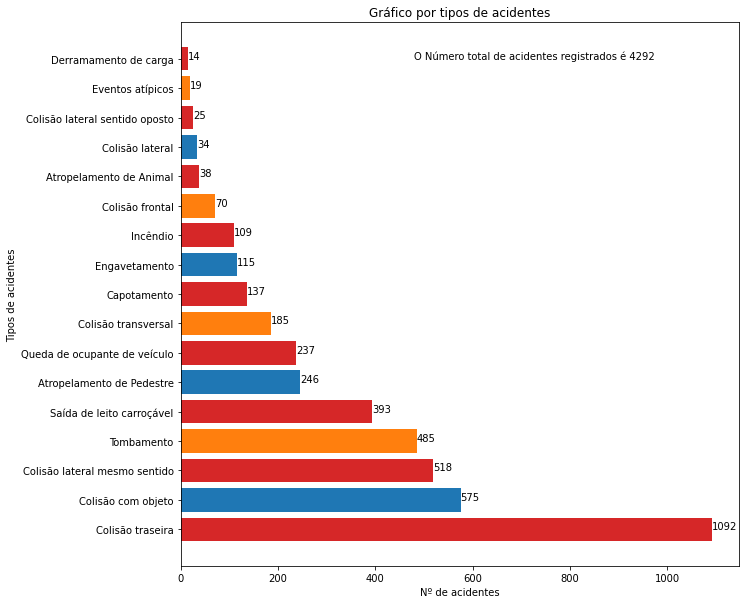

In [ ]:
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']
plt.figure(figsize=(10,10))

plt.barh(list_tipos_acidentes_keys, list_tipos_acidentes_values, 
         color=bar_colors, height = 0.8)

plt.xlabel('Nº de acidentes')
plt.ylabel('Tipos de acidentes')
plt.title('Gráfico por tipos de acidentes')

for index, value in enumerate(list_tipos_acidentes_values): 
    plt.text(value, index, str(value))
    ultima_posicao = index


plt.text(ultima_posicao*30, ultima_posicao, f"O Número total de acidentes registrados é {data.shape[0]}")


plt.show()

# Classificação dos acidentes de trânsito

In [ ]:
data['classificacao_acidente'].value_counts()

Com Vítimas Feridas    3283
Sem Vítimas             806
Com Vítimas Fatais      203
Name: classificacao_acidente, dtype: int64

In [ ]:
dict_classificacao_acidente = dict(data['classificacao_acidente'].value_counts())

In [ ]:
dict_classificacao_acidente.keys()

dict_keys(['Com Vítimas Feridas', 'Sem Vítimas', 'Com Vítimas Fatais'])

In [ ]:
dict_classificacao_acidente.values()

dict_values([3283, 806, 203])

## Gráfico de Pizza

In [ ]:
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n{:d}".format(pct, absolute)

In [ ]:
list_classificacao_acidente_keys = list(dict_classificacao_acidente.keys())
list_classificacao_acidente_values = list(dict_classificacao_acidente.values())

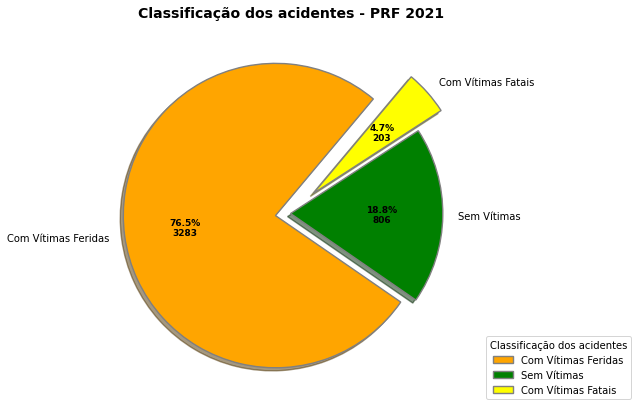

In [ ]:
labels_classificacao_acidente = list_classificacao_acidente_keys  
data_classificacao_acidente = list_classificacao_acidente_values 
  
explode = (0.1, 0.0, 0.2) 
colors = ( "orange", "green", "yellow") 
wp = { "linewidth" : 1.4, "edgecolor" : "grey" } 

fig, ax = plt.subplots(figsize =(10, 7)) 
ax.set_title("Classificação dos acidentes - PRF 2021", size = 14, weight ="bold")
wedges, texts, autotexts = ax.pie(data_classificacao_acidente,  
                                  autopct = lambda pct: func(pct, data_classificacao_acidente), 
                                  explode = explode,  
                                  labels = labels_classificacao_acidente, 
                                  shadow = True, 
                                  colors = colors, 
                                  startangle = 50, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="black")) 
ax.legend(wedges, labels_classificacao_acidente, 
          title ="Classificação dos acidentes", 
          loc ="lower left", 
          bbox_to_anchor =(1, 0, 0.5, 1)) 
  
plt.setp(autotexts, size = 9, weight ="bold")
# plt.tight_layout()
plt.show()

# Condições meteorológicas dos acidentes de trânsito

In [ ]:
data['condicao_metereologica'].value_counts()

Céu Claro           2358
Nublado              897
Chuva                450
Sol                  262
Garoa/Chuvisco       244
Ignorado              48
Nevoeiro/Neblina      28
Vento                  5
Name: condicao_metereologica, dtype: int64

In [ ]:
dict_condicao_metereologica = dict(data['condicao_metereologica'].value_counts())

In [ ]:
dict_condicao_metereologica.keys()

dict_keys(['Céu Claro', 'Nublado', 'Chuva', 'Sol', 'Garoa/Chuvisco', 'Ignorado', 'Nevoeiro/Neblina', 'Vento'])

In [ ]:
dict_condicao_metereologica.values()

dict_values([2358, 897, 450, 262, 244, 48, 28, 5])

## Gráfico de Barra - Horizontal

In [ ]:
list_condicao_metereologica_keys = list(dict_condicao_metereologica.keys())
list_condicao_metereologica_keys

['Céu Claro',
 'Nublado',
 'Chuva',
 'Sol',
 'Garoa/Chuvisco',
 'Ignorado',
 'Nevoeiro/Neblina',
 'Vento']

In [ ]:
list_condicao_metereologica_values = list(dict_condicao_metereologica.values())
list_condicao_metereologica_values

[2358, 897, 450, 262, 244, 48, 28, 5]

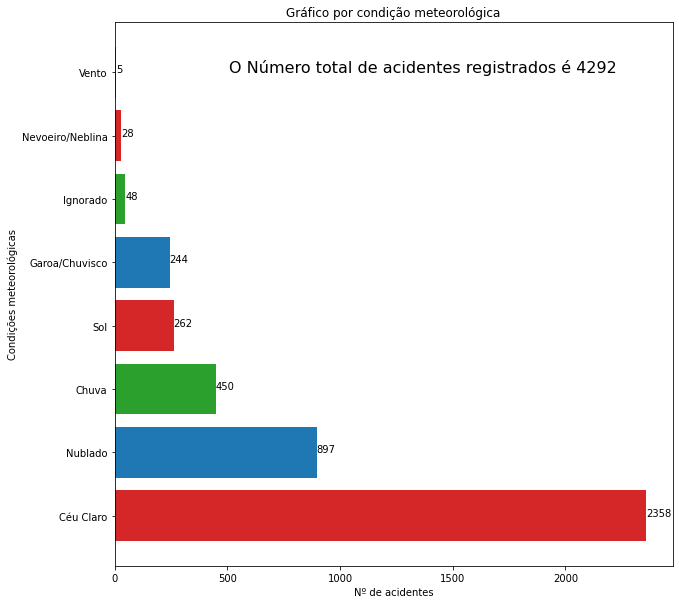

In [ ]:
bar_colors = ['tab:red', 'tab:blue', 'tab:green']
plt.figure(figsize=(10,10))

plt.barh(list_condicao_metereologica_keys, list_condicao_metereologica_values, 
         color=bar_colors, height = 0.8)

plt.xlabel('Nº de acidentes')
plt.ylabel('Condições meteorológicas')
plt.title('Gráfico por condição meteorológica')

for index, value in enumerate(list_condicao_metereologica_values): 
    plt.text(value, index, str(value))
    ultima_posicao = index


plt.text(ultima_posicao + 500, ultima_posicao, f"O Número total de acidentes registrados é {data.shape[0]}", fontsize=16)

plt.show()

# Número de acidentes por rodovias federais

In [ ]:
data['br'].value_counts()

116.0    3099
381.0     554
153.0     409
101.0     167
488.0      31
459.0      26
262.0       4
158.0       2
Name: br, dtype: int64

In [ ]:
data['br']= data['br'].astype(str)

In [ ]:
dict_br = dict(data['br'].value_counts())

In [ ]:
dict_br.keys()

dict_keys(['116.0', '381.0', '153.0', '101.0', '488.0', '459.0', '262.0', '158.0'])

In [ ]:
dict_br.values()

dict_values([3099, 554, 409, 167, 31, 26, 4, 2])

## Gráfico de Barra - Vertical

In [ ]:
list_br_keys = list(dict_br.keys())
str(list_br_keys)

"['116.0', '381.0', '153.0', '101.0', '488.0', '459.0', '262.0', '158.0']"

In [ ]:
list_br_values = list(dict_br.values())
list_br_values

[3099, 554, 409, 167, 31, 26, 4, 2]

In [ ]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]+70,y[i], fontsize=12, horizontalalignment='center',
     verticalalignment='center', bbox=dict(facecolor='red', alpha=0.2))

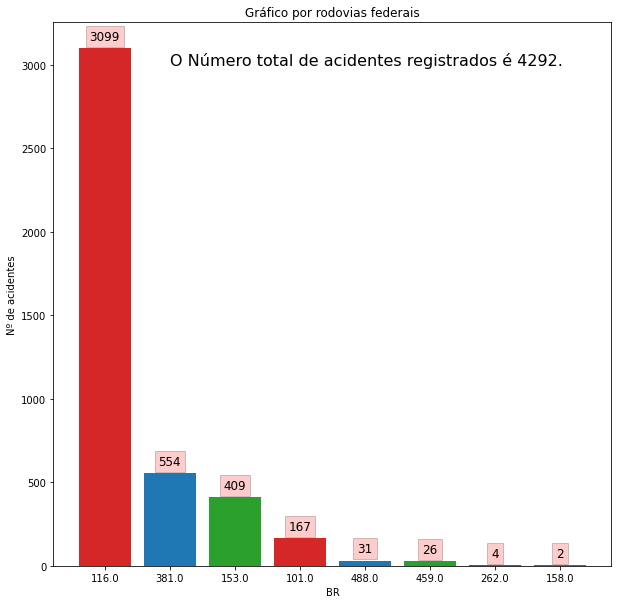

In [ ]:
bar_colors = ['tab:red', 'tab:blue', 'tab:green']
plt.figure(figsize=(10,10))

plt.bar(list_br_keys, list_br_values, 
         color=bar_colors)

plt.xlabel('BR')
plt.ylabel('Nº de acidentes')
plt.title('Gráfico por rodovias federais')

# calling the function to add value labels
addlabels(list_br_keys, list_br_values)

max_list_br_values = max(list_br_values)


plt.text(ultima_posicao - 6, max_list_br_values - 100, f"O Número total de acidentes registrados é {data.shape[0]}.", fontsize=16)

plt.show()

## Gráfico - Número de vítimas fatais por rodovias federais

In [ ]:
filter_data = data.query("classificacao_acidente == 'Com Vítimas Fatais'")
# filter_data

In [ ]:
filter_data.shape

(203, 30)

In [ ]:
filter_data['br'].value_counts()

116.0    161
381.0     24
153.0     14
101.0      3
459.0      1
Name: br, dtype: int64

In [ ]:
dict_br_filter = dict(filter_data['br'].value_counts())

In [ ]:
list_br_filter_keys = list(dict_br_filter.keys())
str(list_br_filter_keys)

"['116.0', '381.0', '153.0', '101.0', '459.0']"

In [ ]:
list_br_filter_values = list(dict_br_filter.values())
list_br_filter_values

[161, 24, 14, 3, 1]

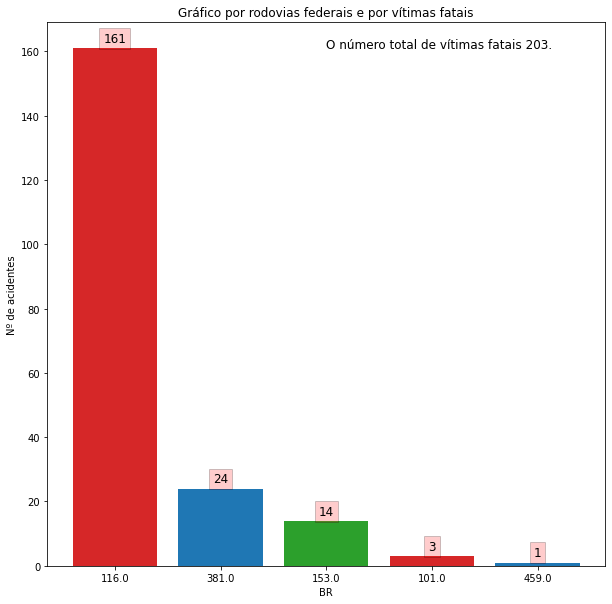

In [ ]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]+3,y[i], fontsize=12, horizontalalignment='center',
     verticalalignment='center', bbox=dict(facecolor='red', alpha=0.2))
        

bar_colors = ['tab:red', 'tab:blue', 'tab:green']
plt.figure(figsize=(10,10))

plt.bar(list_br_filter_keys, list_br_filter_values, 
         color=bar_colors)

plt.xlabel('BR')
plt.ylabel('Nº de acidentes')
plt.title('Gráfico por rodovias federais e por vítimas fatais')

# calling the function to add value labels
addlabels(list_br_filter_keys, list_br_filter_values)

max_list_br_filter_values = max(list_br_filter_values)


plt.text(ultima_posicao - 7, max_list_br_filter_values, f"O número total de vítimas fatais {sum(list_br_filter_values)}.", fontsize=12)

plt.show()

# As 10 cidades de SP com o maior número de acidentes

## Gráfico de Barra - Horizontal

In [ ]:
data['municipio'].value_counts()

GUARULHOS                670
SAO JOSE DOS CAMPOS      304
SAO PAULO                293
CAJATI                   188
SAO JOSE DO RIO PRETO    184
                        ... 
CAMPOS NOVOS PAULISTA      2
PAULICEIA                  2
PEDRO DE TOLEDO            1
SILVEIRAS                  1
RIBEIRAO DO SUL            1
Name: municipio, Length: 62, dtype: int64

In [ ]:
dict_municipio = dict(data['municipio'].value_counts())
dict_municipio.keys()
dict_municipio.values()

dict_values([670, 304, 293, 188, 184, 183, 171, 166, 165, 142, 140, 138, 136, 101, 96, 88, 83, 71, 71, 68, 66, 66, 60, 57, 49, 42, 42, 40, 34, 27, 26, 23, 22, 21, 20, 19, 19, 18, 15, 15, 14, 13, 13, 12, 12, 9, 9, 9, 8, 8, 8, 7, 7, 6, 4, 4, 3, 2, 2, 1, 1, 1])

In [ ]:
list_municipio_keys = list(dict_municipio.keys())
list_municipio_keys = list_municipio_keys[:10]
list_municipio_keys

['GUARULHOS',
 'SAO JOSE DOS CAMPOS',
 'SAO PAULO',
 'CAJATI',
 'SAO JOSE DO RIO PRETO',
 'MIRACATU',
 'TABOAO DA SERRA',
 'UBATUBA',
 'EMBU DAS ARTES',
 'ATIBAIA']

In [ ]:
list_municipio_values = list(dict_municipio.values())
list_municipio_values = list_municipio_values[:10]
sum(list_municipio_values)

2466

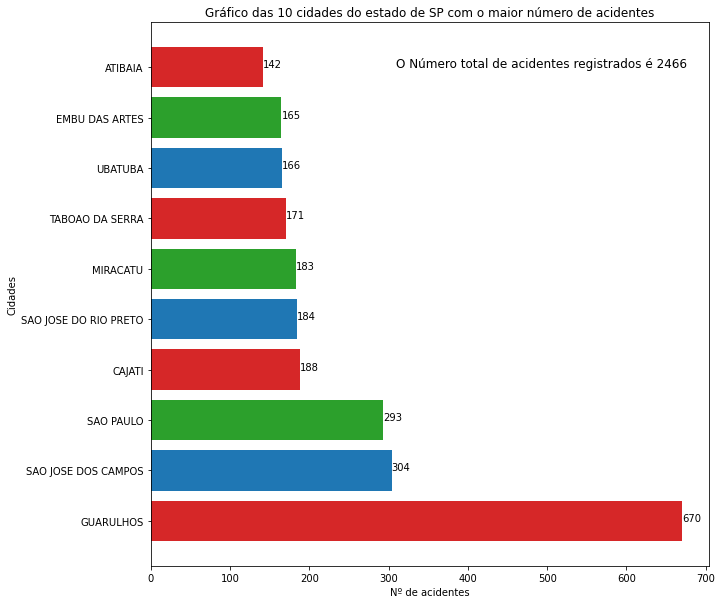

In [ ]:
bar_colors = ['tab:red', 'tab:blue', 'tab:green']
plt.figure(figsize=(10,10))

plt.barh(list_municipio_keys, list_municipio_values, 
         color=bar_colors, height = 0.8)

plt.xlabel('Nº de acidentes')
plt.ylabel('Cidades')
plt.title('Gráfico das 10 cidades do estado de SP com o maior número de acidentes')

for index, value in enumerate(list_municipio_values): 
    plt.text(value, index, str(value))
    ultima_posicao = index


plt.text(ultima_posicao + 300, ultima_posicao, f"O Número total de acidentes registrados é {sum(list_municipio_values)}", fontsize=12)

plt.show()

# Dias da semana e o respectivo número de acidentes

In [ ]:
data['dia_semana'].value_counts()

domingo          745
sábado           739
sexta-feira      673
segunda-feira    556
quinta-feira     547
terça-feira      527
quarta-feira     505
Name: dia_semana, dtype: int64

## Gráfico de Pizza

In [ ]:
dict_dia_semana = dict(data['dia_semana'].value_counts())
dict_dia_semana.keys()
dict_dia_semana.values()

dict_values([745, 739, 673, 556, 547, 527, 505])

In [ ]:
list_dia_semana_keys = list(dict_dia_semana.keys())
list_dia_semana_keys = list_dia_semana_keys
list_dia_semana_keys

['domingo',
 'sábado',
 'sexta-feira',
 'segunda-feira',
 'quinta-feira',
 'terça-feira',
 'quarta-feira']

In [ ]:
list_dia_semana_values = list(dict_dia_semana.values())
list_dia_semana_values = list_dia_semana_values
sum(list_dia_semana_values)

4292

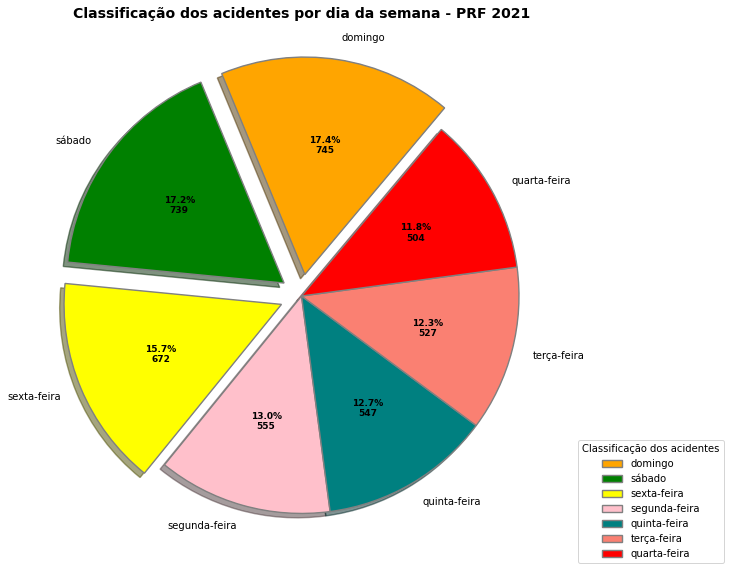

In [ ]:
  
explode = (0.1, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0) 
colors = ( "orange", "green", "yellow", "pink", "teal", "salmon", "red") 
wp = { "linewidth" : 1.4, "edgecolor" : "grey" } 

fig, ax = plt.subplots(figsize =(10, 10)) 
ax.set_title("Classificação dos acidentes por dia da semana - PRF 2021", size = 14, weight ="bold")
wedges, texts, autotexts = ax.pie(list_dia_semana_values,  
                                  autopct = lambda pct: func(pct, list_dia_semana_values), 
                                  explode = explode,  
                                  labels = list_dia_semana_keys, 
                                  shadow = True, 
                                  colors = colors, 
                                  startangle = 50, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="black")) 
ax.legend(wedges, list_dia_semana_keys, 
          title ="Classificação dos acidentes", 
          loc ="lower left", 
          bbox_to_anchor =(1, 0, 0.5, 1)) 
  
plt.setp(autotexts, size = 9, weight ="bold")
# plt.tight_layout()
plt.show()
